# K-means Clustering

## Import Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_iris

## Load Dataset Iris

In [55]:
print("Memuat Iris dataset dari sklearn.datasets...")
try:
    iris = load_iris()

    data_iris = iris.data
    species_labels = iris.target_names[iris.target]

    print("Dataset berhasil dimuat.")
    print(f"\nBentuk matriks fitur data_iris: {data_iris.shape}")
    print(f"Nama kolom fitur: {iris.feature_names}")
    print(f"Bentuk array label spesies: {species_labels.shape}")
    print("\nLima baris pertama fitur dataset Iris:")
    print(pd.DataFrame(data_iris, columns=iris.feature_names).head())

except Exception as e:
    print(f"Terjadi kesalahan saat memuat dataset Iris: {e}")

Memuat Iris dataset dari sklearn.datasets...
Dataset berhasil dimuat.

Bentuk matriks fitur data_iris: (150, 4)
Nama kolom fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Bentuk array label spesies: (150,)

Lima baris pertama fitur dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Visualisasi Data Awal

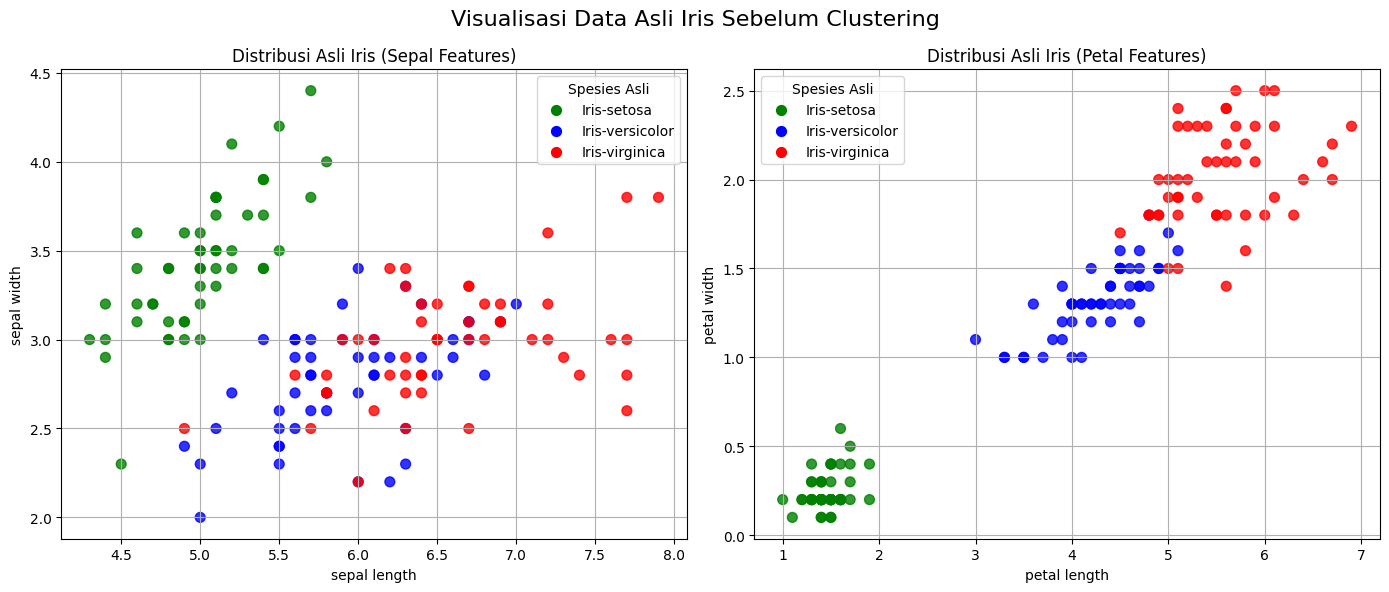

In [56]:
species_to_color = {
    'setosa': 'green',
    'versicolor': 'blue',
    'virginica': 'red'
}

colors_for_plot = [species_to_color[s] for s in species_labels]

feature_names = iris.feature_names

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_iris[:, 0], data_iris[:, 1], c=colors_for_plot, s=50, alpha=0.8)
plt.title('Distribusi Asli Iris (Sepal Features)')
plt.xlabel(feature_names[0].replace(" (cm)", ""))
plt.ylabel(feature_names[1].replace(" (cm)", ""))
plt.grid(True)

for species, color in species_to_color.items():
    plt.scatter([], [], c=color, label=f'Iris-{species}', s=50)

plt.legend(title="Spesies Asli")

plt.subplot(1, 2, 2)
plt.scatter(data_iris[:, 2], data_iris[:, 3], c=colors_for_plot, s=50, alpha=0.8)
plt.title('Distribusi Asli Iris (Petal Features)')
plt.xlabel(feature_names[2].replace(" (cm)", ""))
plt.ylabel(feature_names[3].replace(" (cm)", ""))
plt.grid(True)

for species, color in species_to_color.items():
    plt.scatter([], [], c=color, label=f'Iris-{species}', s=50)

plt.legend(title="Spesies Asli")

plt.suptitle('Visualisasi Data Asli Iris Sebelum Clustering', fontsize=16)
plt.tight_layout()
plt.show()

## K-means Clustering

In [57]:
def euclidean_distance(point1, point2):
    """Menghitung jarak Euclidean antara dua titik."""
    return np.sqrt(np.sum((point1 - point2)**2))

def initialize_centroids(data, k):
    """Menginisialisasi centroid secara acak dari data."""
    np.random.seed(42)
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_to_clusters(data, centroids):
    """Menugaskan setiap titik data ke cluster terdekat."""
    clusters = [[] for _ in range(len(centroids))]
    labels = np.zeros(data.shape[0], dtype=int)
    for i, point in enumerate(data):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(i)
        labels[i] = closest_centroid
    return clusters, labels

def update_centroids(data, clusters):
    """Memperbarui posisi centroid berdasarkan rata-rata titik dalam cluster."""
    new_centroids = np.zeros((len(clusters), data.shape[1]))
    for i, cluster_indices in enumerate(clusters):
        if len(cluster_indices) > 0:
            new_centroids[i] = np.mean(data[cluster_indices], axis=0)
        else:

            pass
    return new_centroids

def calculate_wcss(data, centroids, labels):
    """Menghitung Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for i, centroid in enumerate(centroids):
        points_in_cluster = data[labels == i]
        for point in points_in_cluster:
            wcss += euclidean_distance(point, centroid)**2
    return wcss

def kmeans(data, k, max_iterations=100):
    """Implementasi algoritma K-Means."""
    centroids = initialize_centroids(data, k)

    for iteration in range(max_iterations):
        clusters, labels = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters)

        if np.allclose(new_centroids, centroids):
            print(f"K-Means konvergen pada iterasi {iteration + 1}")
            break
        centroids = new_centroids

    clusters, labels = assign_to_clusters(data, centroids)
    final_wcss = calculate_wcss(data, centroids, labels)

    return centroids, labels, final_wcss

## Elbow Methods

Menjalankan K-Means untuk k = 1...
K-Means konvergen pada iterasi 2
Menjalankan K-Means untuk k = 2...
K-Means konvergen pada iterasi 4
Menjalankan K-Means untuk k = 3...
K-Means konvergen pada iterasi 6
Menjalankan K-Means untuk k = 4...
K-Means konvergen pada iterasi 9
Menjalankan K-Means untuk k = 5...
K-Means konvergen pada iterasi 5
Menjalankan K-Means untuk k = 6...
K-Means konvergen pada iterasi 5
Menjalankan K-Means untuk k = 7...
K-Means konvergen pada iterasi 9
Menjalankan K-Means untuk k = 8...
K-Means konvergen pada iterasi 5
Menjalankan K-Means untuk k = 9...
K-Means konvergen pada iterasi 9
Menjalankan K-Means untuk k = 10...
K-Means konvergen pada iterasi 6


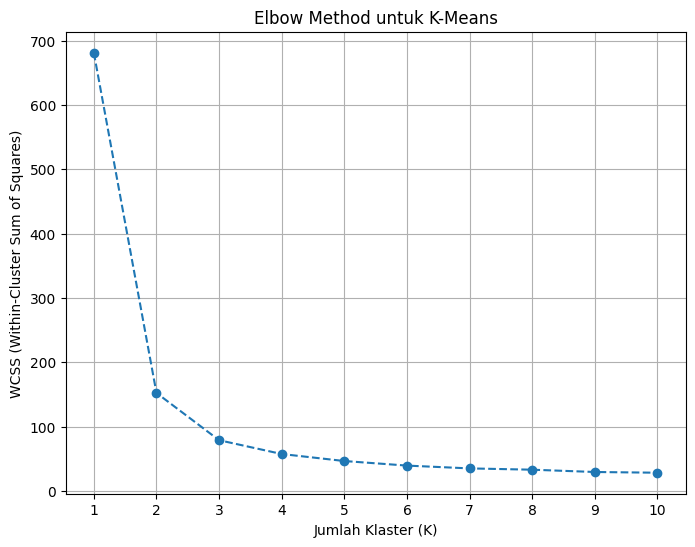

In [58]:
wcss_values = []
max_k = 10

for k_val in range(1, max_k + 1):
    print(f"Menjalankan K-Means untuk k = {k_val}...")
    _, _, wcss = kmeans(data_iris, k_val)
    wcss_values.append(wcss)

# Plotting Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wcss_values, marker='o', linestyle='--')
plt.title('Elbow Method untuk K-Means')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

## Run K-means dengan K optimal dan visualisasi


Menjalankan K-Means dengan K optimal = 3...
K-Means konvergen pada iterasi 6

Centroid akhir:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Ukuran masing-masing klaster:
Klaster 0: 62 titik
Klaster 1: 50 titik
Klaster 2: 38 titik


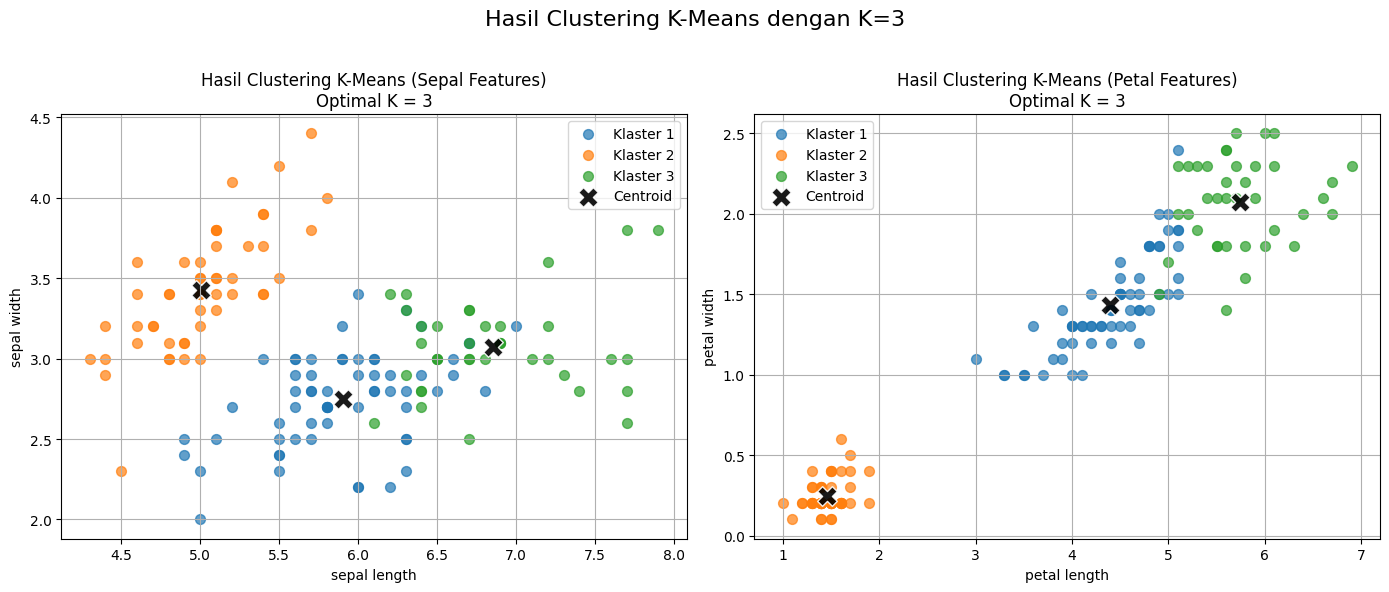

In [59]:
# Berdasarkan elbow, K optimal = 3 (yang merupakan titik siku)
optimal_k = 3
print(f"\nMenjalankan K-Means dengan K optimal = {optimal_k}...")
final_centroids, final_labels, _ = kmeans(data_iris, optimal_k)

print("\nCentroid akhir:")
print(final_centroids)
print("\nUkuran masing-masing klaster:")
for i in range(optimal_k):
    print(f"Klaster {i}: {np.sum(final_labels == i)} titik")

plt.figure(figsize=(14, 6))

feature_x_idx_sepal = 0 # Sepal Length (cm)
feature_y_idx_sepal = 1 # Sepal Width (cm)
feature_x_idx_petal = 2 # Petal Length (cm)
feature_y_idx_petal = 3 # Petal Width (cm)
feature_names = iris.feature_names

kmeans_cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

unique_cluster_labels = np.unique(final_labels)

# Subplot 1: Hasil Clustering K-Means (Sepal Features)
plt.subplot(1, 2, 1)
for cluster_label in unique_cluster_labels:

    color_idx = int(cluster_label)

    points_in_cluster = data_iris[final_labels == cluster_label]

    if 0 <= color_idx < len(kmeans_cluster_colors):
        point_color = kmeans_cluster_colors[color_idx]
    else:
        point_color = 'gray'

    plt.scatter(points_in_cluster[:, feature_x_idx_sepal], points_in_cluster[:, feature_y_idx_sepal],
                color=point_color, s=50, label=f'Klaster {cluster_label + 1}', alpha=0.7)

# Plot Centroid untuk Sepal Features
plt.scatter(final_centroids[:, feature_x_idx_sepal], final_centroids[:, feature_y_idx_sepal],
            c='black', s=200, marker='X', label='Centroid', alpha=0.9, edgecolors='white')

plt.title(f'Hasil Clustering K-Means (Sepal Features)\nOptimal K = {optimal_k}')
plt.xlabel(feature_names[feature_x_idx_sepal].replace(" (cm)", ""))
plt.ylabel(feature_names[feature_y_idx_sepal].replace(" (cm)", ""))
plt.legend()
plt.grid(True)


# Subplot 2: Hasil Clustering K-Means (Petal Features)
plt.subplot(1, 2, 2)
for cluster_label in unique_cluster_labels:
    color_idx = int(cluster_label)
    points_in_cluster = data_iris[final_labels == cluster_label]

    if 0 <= color_idx < len(kmeans_cluster_colors):
        point_color = kmeans_cluster_colors[color_idx]
    else:
        point_color = 'gray'

    plt.scatter(points_in_cluster[:, feature_x_idx_petal], points_in_cluster[:, feature_y_idx_petal],
                color=point_color, s=50, label=f'Klaster {cluster_label + 1}', alpha=0.7)

# Plot Centroid untuk Petal Features
plt.scatter(final_centroids[:, feature_x_idx_petal], final_centroids[:, feature_y_idx_petal],
            c='black', s=200, marker='X', label='Centroid', alpha=0.9, edgecolors='white')

plt.title(f'Hasil Clustering K-Means (Petal Features)\nOptimal K = {optimal_k}')
plt.xlabel(feature_names[feature_x_idx_petal].replace(" (cm)", ""))
plt.ylabel(feature_names[feature_y_idx_petal].replace(" (cm)", ""))
plt.legend()
plt.grid(True)

plt.suptitle(f'Hasil Clustering K-Means dengan K={optimal_k}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# DBScan Clustering

## DBscan Clustering

In [60]:
NOISE_LABEL = -1

def euclidean_distance(point1, point2):
    """Menghitung jarak Euclidean antara dua titik."""
    return np.sqrt(np.sum((point1 - point2)**2))

def get_neighbors(X_data, point_index, eps, distance_matrix):
    """Menemukan indeks semua titik tetangga dalam radius eps dari titik tertentu menggunakan distance matrix."""
    neighbors = []
    for i in range(X_data.shape[0]):
        if distance_matrix[point_index, i] <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point_idx, neighbors_of_point, cluster_id, eps, min_pts, distance_matrix):
    """Mengembangkan cluster dari titik inti."""
    labels[point_idx] = cluster_id

    # Gunakan list/stack untuk tetangga yang perlu diproses
    queue_neighbors = list(neighbors_of_point)

    print(f"  Menambahkan titik {point_idx} ke cluster {cluster_id}.")

    i = 0
    while i < len(queue_neighbors):
        n_idx = queue_neighbors[i]

        # Jika titik sudah noise, bisa jadi border point
        if labels[n_idx] == NOISE_LABEL:
            labels[n_idx] = cluster_id
            print(f"  Titik noise {n_idx} dijadikan border point untuk cluster {cluster_id}.")
        # Jika titik belum dikunjungi (label 0)
        elif labels[n_idx] == 0:
            labels[n_idx] = cluster_id # Tetapkan ke cluster saat ini
            print(f"  Titik {n_idx} masuk ke cluster {cluster_id}.")

            # Panggil get_neighbors dengan distance_matrix
            n_neighbors = get_neighbors(data, n_idx, eps, distance_matrix)

            if len(n_neighbors) >= min_pts:
                print(f"    Titik {n_idx} menjadi core point, memperluas cluster.")
                for new_n in n_neighbors:
                    if new_n not in queue_neighbors:
                        queue_neighbors.append(new_n)
        i += 1


def dbscan_verbose(data, eps, min_pts, distance_matrix):
    """Implementasi algoritma DBSCAN dengan output log detil."""
    num_points = data.shape[0]
    labels = np.zeros(num_points, dtype=int) # 0: unvisited, -1: noise, >0: cluster_id

    cluster_id_counter = 0

    print(f"\nMenjalankan DBSCAN dengan eps = {eps} dan minPts = {min_pts}...")
    print("Matriks jarak telah dihitung sebelumnya.")

    for i in range(num_points):
        if labels[i] != 0:
            continue

        # Panggil get_neighbors dengan distance_matrix
        neighbors = get_neighbors(data, i, eps, distance_matrix)

        if len(neighbors) < min_pts:
            labels[i] = NOISE_LABEL
        else:
            cluster_id_counter += 1
            print(f"Titik {i} adalah core point, memulai cluster {cluster_id_counter}.")
            # Panggil expand_cluster dengan distance_matrix
            expand_cluster(data, labels, i, neighbors, cluster_id_counter, eps, min_pts, distance_matrix)

    print("\nProses DBSCAN selesai.")
    return labels

## Tuning Parameter

Menghitung matriks jarak Euclidean untuk DBSCAN...
Matriks jarak selesai dihitung.


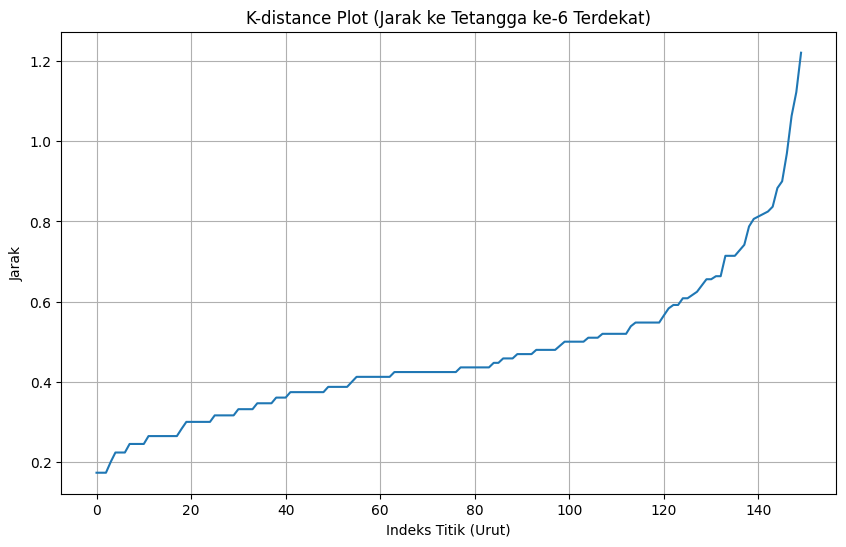

In [79]:
dbscan_data = data_iris

NOISE_LABEL = -1

print("Menghitung matriks jarak Euclidean untuk DBSCAN...")
num_points = dbscan_data.shape[0]
distance_matrix = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(i, num_points):
        dist = euclidean_distance(dbscan_data[i], dbscan_data[j])
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist
print("Matriks jarak selesai dihitung.")

min_pts = 6

# Plot K-distance (distance to the k-th nearest neighbor) for Eps
# Mengambil jarak ke tetangga ke-(min_pts) terdekat untuk setiap titik
distances = []
for i in range(dbscan_data.shape[0]):
    point_distances = []
    for j in range(dbscan_data.shape[0]):
        if i != j:
            point_distances.append(distance_matrix[i, j])

    point_distances.sort()

    if len(point_distances) >= min_pts - 1:
        distances.append(point_distances[min_pts - 1])

distances.sort()

plt.figure(figsize=(10, 6))
plt.plot(range(len(distances)), distances)
plt.title(f'K-distance Plot (Jarak ke Tetangga ke-{min_pts} Terdekat)')
plt.xlabel('Indeks Titik (Urut)')
plt.ylabel('Jarak')
plt.grid(True)
plt.show()

## Run DBScan dengan Tuned Parameter dan hasil visualisasi

Nilai min_pts yang dipilih untuk DBSCAN: 6
Nilai Eps yang dipilih untuk DBSCAN: 0.5

Menjalankan DBSCAN dengan eps = 0.5 dan minPts = 6...
Matriks jarak telah dihitung sebelumnya.
Titik 0 adalah core point, memulai cluster 1.
  Menambahkan titik 0 ke cluster 1.
  Titik 4 masuk ke cluster 1.
    Titik 4 menjadi core point, memperluas cluster.
  Titik 7 masuk ke cluster 1.
    Titik 7 menjadi core point, memperluas cluster.
  Titik 9 masuk ke cluster 1.
    Titik 9 menjadi core point, memperluas cluster.
  Titik 10 masuk ke cluster 1.
    Titik 10 menjadi core point, memperluas cluster.
  Titik 11 masuk ke cluster 1.
    Titik 11 menjadi core point, memperluas cluster.
  Titik 17 masuk ke cluster 1.
    Titik 17 menjadi core point, memperluas cluster.
  Titik 19 masuk ke cluster 1.
    Titik 19 menjadi core point, memperluas cluster.
  Titik 20 masuk ke cluster 1.
    Titik 20 menjadi core point, memperluas cluster.
  Titik 21 masuk ke cluster 1.
    Titik 21 menjadi core point, memperlu

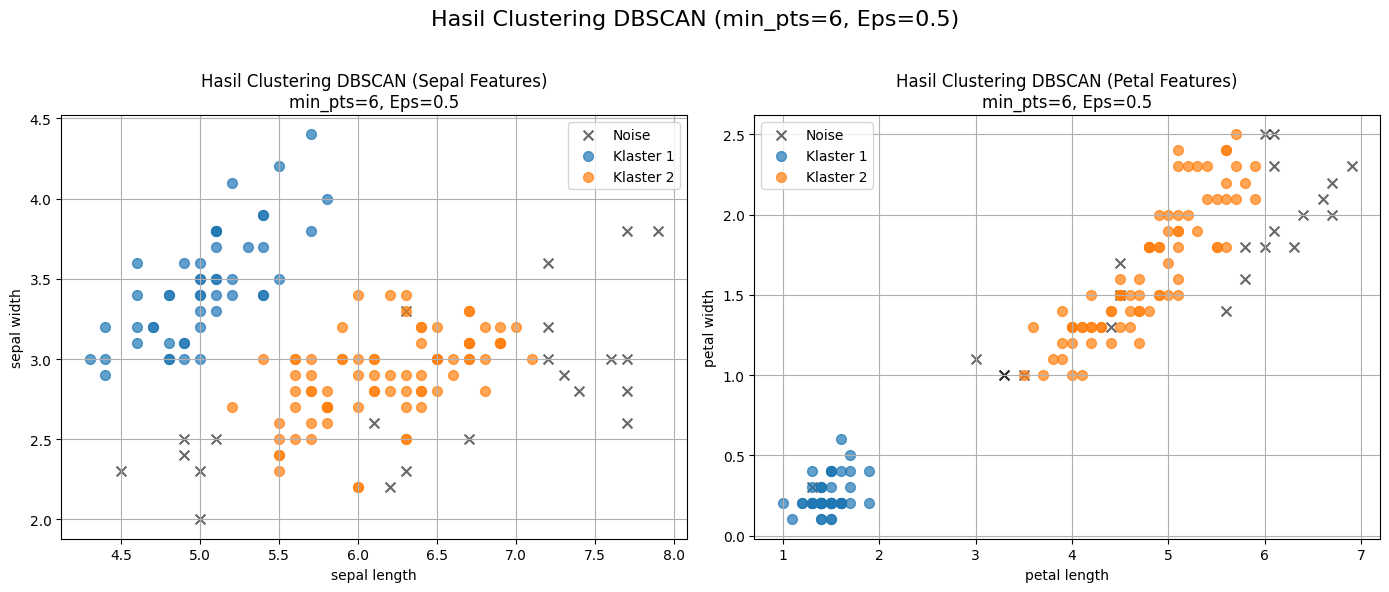

In [80]:
chosen_eps = 0.5
chosen_min_pts = min_pts

print(f"Nilai min_pts yang dipilih untuk DBSCAN: {chosen_min_pts}")
print(f"Nilai Eps yang dipilih untuk DBSCAN: {chosen_eps}")

# Panggil fungsi dbscan_verbose yang baru kita buat dengan distance_matrix
dbscan_labels = dbscan_verbose(dbscan_data, chosen_eps, chosen_min_pts, distance_matrix)

unique_clusters = np.unique(dbscan_labels)
# Hitung jumlah klaster (label > 0)
num_clusters_found = len(unique_clusters[unique_clusters > 0])
num_noise_points = np.sum(dbscan_labels == NOISE_LABEL)

print(f"\nClustering Selesai.")
print(f"Label unik yang dihasilkan: {np.unique(dbscan_labels)}")
print(f"Jumlah cluster yang ditemukan: {num_clusters_found}")
print(f"Jumlah titik noise: {num_noise_points}")

# Cetak ukuran setiap klaster
for i in range(1, num_clusters_found + 1):
    print(f"Klaster {i}: {np.sum(dbscan_labels == i)} titik")
if num_noise_points > 0:
    print(f"Noise ({NOISE_LABEL}): {num_noise_points} titik")

plt.figure(figsize=(14, 6))

feature_x_idx_sepal = 0 # Sepal Length (cm)
feature_y_idx_sepal = 1 # Sepal Width (cm)
feature_x_idx_petal = 2 # Petal Length (cm)
feature_y_idx_petal = 3 # Petal Width (cm)
feature_names = iris.feature_names

dbscan_cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Subplot 1: Hasil Clustering DBSCAN (Sepal Features)
plt.subplot(1, 2, 1)

# Plot titik-titik berdasarkan klaster ID yang dihasilkan DBSCAN
for cluster_id in np.unique(dbscan_labels):
    if cluster_id == NOISE_LABEL:
        plt.scatter(data_iris[dbscan_labels == cluster_id, feature_x_idx_sepal],
                    data_iris[dbscan_labels == cluster_id, feature_y_idx_sepal],
                    s=50, c='black', marker='x', label='Noise', alpha=0.6)
    else:
        color_index = (cluster_id - 1) % len(dbscan_cluster_colors)
        plt.scatter(data_iris[dbscan_labels == cluster_id, feature_x_idx_sepal],
                    data_iris[dbscan_labels == cluster_id, feature_y_idx_sepal],
                    s=50, c=dbscan_cluster_colors[color_index], label=f'Klaster {cluster_id}', alpha=0.7)

plt.title(f'Hasil Clustering DBSCAN (Sepal Features)\nmin_pts={chosen_min_pts}, Eps={chosen_eps}')
plt.xlabel(feature_names[feature_x_idx_sepal].replace(" (cm)", ""))
plt.ylabel(feature_names[feature_y_idx_sepal].replace(" (cm)", ""))
plt.legend()
plt.grid(True)


# Subplot 2: Hasil Clustering DBSCAN (Petal Features)
plt.subplot(1, 2, 2)

# Plot titik-titik berdasarkan klaster ID yang dihasilkan DBSCAN
for cluster_id in np.unique(dbscan_labels):
    if cluster_id == NOISE_LABEL:
        plt.scatter(data_iris[dbscan_labels == cluster_id, feature_x_idx_petal],
                    data_iris[dbscan_labels == cluster_id, feature_y_idx_petal],
                    s=50, c='black', marker='x', label='Noise', alpha=0.6)
    else:
        color_index = (cluster_id - 1) % len(dbscan_cluster_colors)
        plt.scatter(data_iris[dbscan_labels == cluster_id, feature_x_idx_petal],
                    data_iris[dbscan_labels == cluster_id, feature_y_idx_petal],
                    s=50, c=dbscan_cluster_colors[color_index], label=f'Klaster {cluster_id}', alpha=0.7)

plt.title(f'Hasil Clustering DBSCAN (Petal Features)\nmin_pts={chosen_min_pts}, Eps={chosen_eps}')
plt.xlabel(feature_names[feature_x_idx_petal].replace(" (cm)", ""))
plt.ylabel(feature_names[feature_y_idx_petal].replace(" (cm)", ""))
plt.legend()
plt.grid(True)

plt.suptitle(f'Hasil Clustering DBSCAN (min_pts={chosen_min_pts}, Eps={chosen_eps})', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()